# Tutorial de CNN
https://youtu.be/yUB9JQQVtoU

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt
#only if you have jupyterthemes
from jupyterthemes import jtplot
jtplot.style()

In [2]:
DATA_PATH = './cifar-10/cifar-10-batches-py'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

In [3]:
transform_cifar = T.Compose(
    [
        T.ToTensor(),
        T.Normalize(
            [
               0.491, 0.482, 0.447 
            ],
            [
                0.247, 0.243, 0.261
            ]
        )
    ]
)
# Train dataset
cifar10_train = datasets.CIFAR10(
    DATA_PATH, 
    train=True,
    download=True,
    transform=transform_cifar
)

train_loader = DataLoader(
    cifar10_train,
    batch_size=MINIBATCH_SIZE,
    sampler=sampler.SubsetRandomSampler(
        range(NUM_TRAIN)
    )
)
# Validation dataset
cifar10_val = datasets.CIFAR10(
    DATA_PATH, 
    train=False,
    download=True,
    transform=transform_cifar
)

val_loader = DataLoader(
    cifar10_train,
    batch_size=MINIBATCH_SIZE,
    sampler=sampler.SubsetRandomSampler(
        range(NUM_VAL)
    )
)

# Test dataset
cifar10_test = datasets.CIFAR10(
    DATA_PATH, 
    train=False,
    download=True,
    transform=transform_cifar
)

test_loader = DataLoader(
    cifar10_test,
    batch_size=MINIBATCH_SIZE,
    sampler=sampler.SubsetRandomSampler(
        range(NUM_VAL, len(cifar10_test))
    )
)



Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [4]:
test_loader.dataset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./cifar-10/cifar-10-batches-py
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

# usar GPU

In [5]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)


cpu


/home/pacopeca/.local/share/virtualenvs/CURSO_DEEP_LEARNING_PEPE-N74Y2PxC/lib/python3.10/site-packages/torch/cuda/__init__.py:88: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


La imagen muestreada representa un: frog


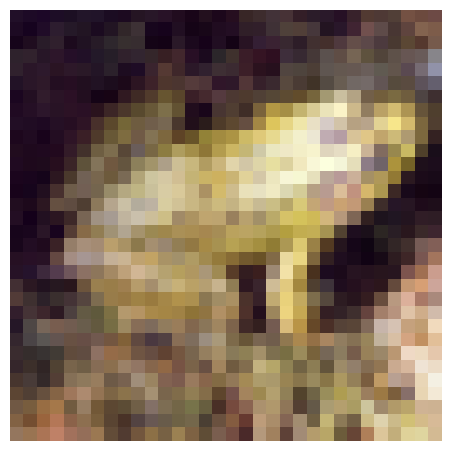

In [6]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)

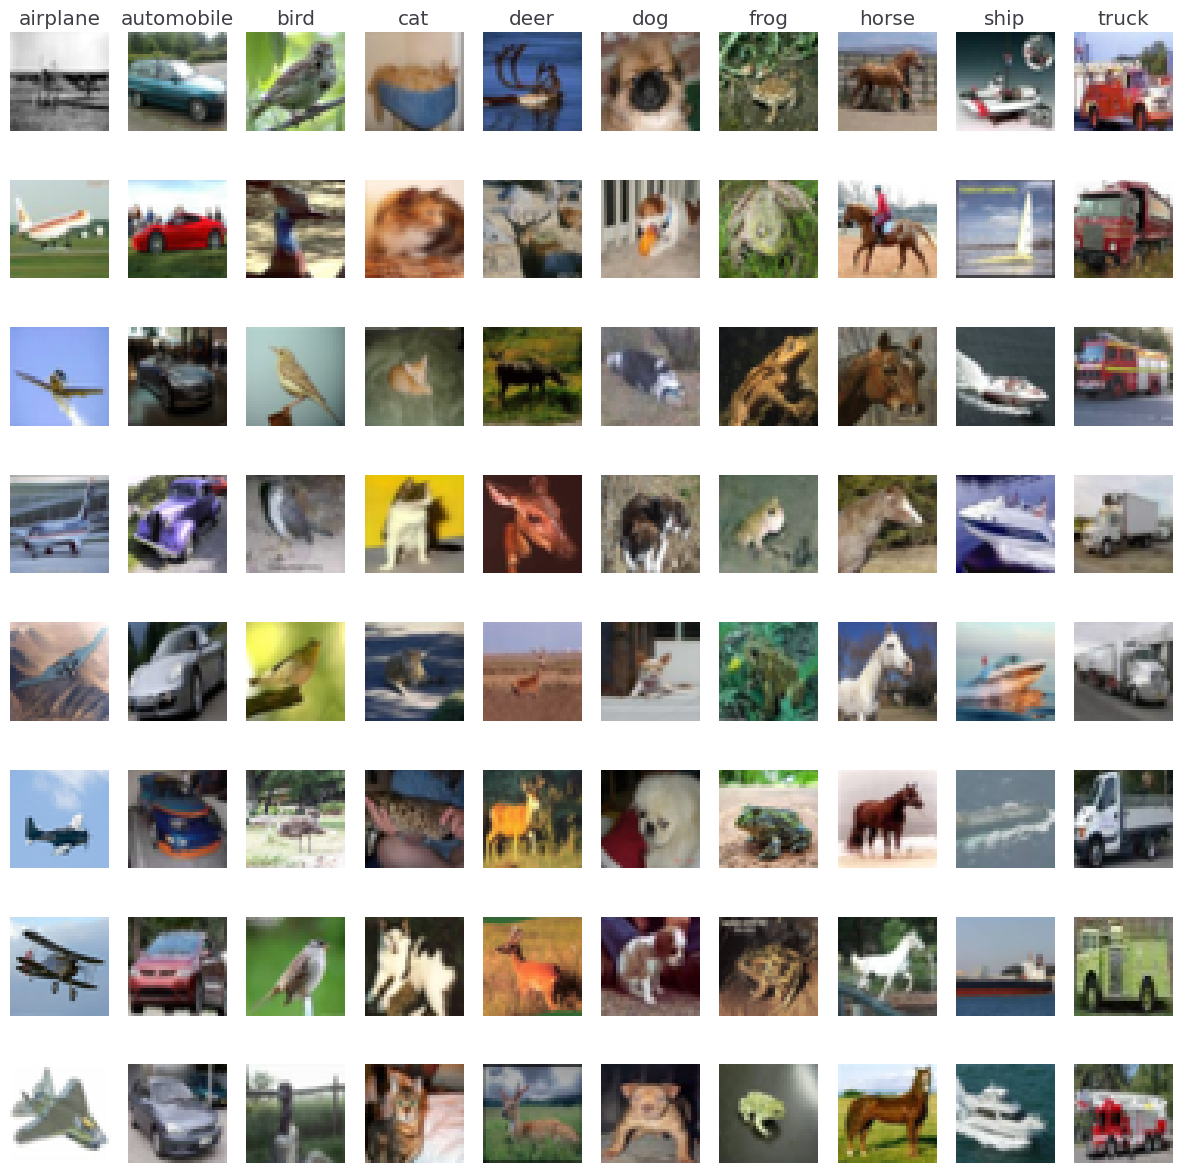

In [7]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')
            
            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid() 

In [8]:
def accuracy(model, loader):
    num_correct = 0
    num_total = 0
    model.eval()
    model = model.to(device=device)
    with torch.no_grad():
        for xi, yi in loader:
            xi = xi.to(device=device, dtype = torch.float32)
            yi = yi.to(device=device, dtype = torch.long)
            scores = model(xi) 
            _, pred = scores.max(dim=1) 
            num_correct += (pred == yi).sum() 
            num_total += pred.size(0)
        return float(num_correct)/num_total   

In [9]:
def train(model, optimiser, epochs=100):
    model = model.to(device=device)
    for epoch in range(epochs):
        for i, (xi, yi) in enumerate(train_loader):
            model.train()
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)
            cost = F.cross_entropy(input=scores, target=yi)
            optimiser.zero_grad()           
            cost.backward()
            optimiser.step()              
        acc = accuracy(model, val_loader) 
        print(f'Epoch: {epoch}, costo: {cost.item()}, accuracy: {acc},')

In [10]:
for i, (x, y) in enumerate(test_loader):
    print(i, x.shape, y.shape)

0 torch.Size([64, 3, 32, 32]) torch.Size([64])
1 torch.Size([64, 3, 32, 32]) torch.Size([64])
2 torch.Size([64, 3, 32, 32]) torch.Size([64])
3 torch.Size([64, 3, 32, 32]) torch.Size([64])
4 torch.Size([64, 3, 32, 32]) torch.Size([64])
5 torch.Size([64, 3, 32, 32]) torch.Size([64])
6 torch.Size([64, 3, 32, 32]) torch.Size([64])
7 torch.Size([64, 3, 32, 32]) torch.Size([64])
8 torch.Size([64, 3, 32, 32]) torch.Size([64])
9 torch.Size([64, 3, 32, 32]) torch.Size([64])
10 torch.Size([64, 3, 32, 32]) torch.Size([64])
11 torch.Size([64, 3, 32, 32]) torch.Size([64])
12 torch.Size([64, 3, 32, 32]) torch.Size([64])
13 torch.Size([64, 3, 32, 32]) torch.Size([64])
14 torch.Size([64, 3, 32, 32]) torch.Size([64])
15 torch.Size([64, 3, 32, 32]) torch.Size([64])
16 torch.Size([64, 3, 32, 32]) torch.Size([64])
17 torch.Size([64, 3, 32, 32]) torch.Size([64])
18 torch.Size([64, 3, 32, 32]) torch.Size([64])
19 torch.Size([64, 3, 32, 32]) torch.Size([64])
20 torch.Size([64, 3, 32, 32]) torch.Size([64])
21

In [11]:
hidden1 = 256 
hidden = 256
lr = 1e-3
epochs = 5
model1 = nn.Sequential(nn.Flatten(),
                       nn.Linear(
                           in_features=32*32*3,
                           out_features=hidden1
                       ),
                       nn.ReLU(),
                       nn.Linear(
                           in_features=hidden1,
                           out_features=hidden
                       ),
                       nn.ReLU(),
                       nn.Linear(
                           in_features=hidden,
                           out_features=10)
                      )
optimiser = torch.optim.Adam(model1.parameters(), lr=lr)

In [12]:

train(model1, optimiser, epochs)

Epoch: 0, costo: 1.9225950241088867, accuracy: 0.4824,


KeyboardInterrupt: 

 # Sequential CNN

In [13]:

channel1 = 16
channel2 = 16*2
epochs = 5
lr = 1e-4

modelCNN = nn.Sequential(
    nn.Conv2d(
        in_channels=3,
        out_channels=channel1,
        kernel_size=3,
        padding=1
    ),
    nn.ReLU(),
    nn.Conv2d(
        in_channels=channel1,
        out_channels=channel2,
        kernel_size=3,
        padding=1
    ),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(
        in_features=16*16*channel2,
        out_features=10
    )
    
    
    
    
    
)
                       

In [14]:
optimizer = torch.optim.Adam(
    modelCNN.parameters(), lr=lr
)

In [15]:
train(model=modelCNN, optimiser=optimizer, epochs=epochs)

KeyboardInterrupt: 

# OOP
Creando modelo con programación orientado a objetos

In [19]:
class CNN_class1(nn.Module):
    def __init__(self, in_channel, channel1, channel2):
        super().__init__()
        self.conv1 = nn.Conv2d(
            in_channels=in_channel, out_channels=channel1,
            kernel_size=3, padding=1,
        )
        self.conv2 = nn.Conv2d(
            in_channels=channel1, out_channels=channel2,
            kernel_size=3, padding=1,
        )
        self.max_pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(
            in_features=16*16*channel2,
            out_features=10
        )
        self.flatten = nn.Flatten()
        
    def forward(self, x):
        x = F.relu(self.conv2(F.relu(self.conv1(x))))
        x = self.max_pool(x)
        x = self.flatten(x)
        return self.fc(x)

In [23]:
channel1 = 16
channel2 = 16*2
epochs = 10
lr = 1e-4
modelCNN = CNN_class1(3, channel1, channel2)
optimzier = torch.optim.Adam(modelCNN.parameters(), lr)


In [24]:
train(modelCNN, optimzier, epochs)

Epoch: 0, costo: 1.900547981262207, accuracy: 0.5068,
Epoch: 1, costo: 1.4036543369293213, accuracy: 0.5548,
Epoch: 2, costo: 1.2245196104049683, accuracy: 0.5846,
Epoch: 3, costo: 1.0390022993087769, accuracy: 0.6032,
Epoch: 4, costo: 0.8865743279457092, accuracy: 0.6182,
Epoch: 5, costo: 1.0451359748840332, accuracy: 0.6384,
Epoch: 6, costo: 0.7227598428726196, accuracy: 0.6506,
Epoch: 7, costo: 1.4750077724456787, accuracy: 0.6602,
Epoch: 8, costo: 0.8672226667404175, accuracy: 0.666,
Epoch: 9, costo: 0.7712290287017822, accuracy: 0.6826,


# Un poco más elegante

In [27]:
conv_k_3 = lambda channel1, channel2: nn.Conv2d(channel1, channel2, kernel_size=3, padding=1)

In [28]:
class CNN_class2(nn.Module):
    def __init__(self, in_channel, channel1, channel2):
        super().__init__()
        
        self.conv1 = conv_k_3(
            channel1=in_channel,
            channel2=channel1
        )
        nn.init.kaiming_uniform_(self.conv1.weight)
        
        self.conv2 = conv_k_3(
            channel1=channel1,
            channel2=channel2
        )
        nn.init.kaiming_uniform_(self.conv2.weight)
        
        self.max_pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(
            in_features=16*16*channel2,
            out_features=10
        )
        nn.init.kaiming_uniform_(self.fc.weight)
        self.flatten = nn.Flatten()
        
    def forward(self, x):
        x = F.relu(self.conv2(F.relu(self.conv1(x))))
        x = self.max_pool(x)
        x = self.flatten(x)
        return self.fc(x)

In [30]:
channel1 = 16
channel2 = 16*2
epochs = 10
lr = 1e-4
modelCNN = CNN_class2(3, channel1, channel2)
optimzier = torch.optim.Adam(modelCNN.parameters(), lr)

In [31]:
train(modelCNN, optimzier, epochs)

Epoch: 0, costo: 1.7155624628067017, accuracy: 0.5178,
Epoch: 1, costo: 0.8362566232681274, accuracy: 0.5636,
Epoch: 2, costo: 1.0966087579727173, accuracy: 0.6154,
Epoch: 3, costo: 1.0247209072113037, accuracy: 0.6388,
Epoch: 4, costo: 0.8444734811782837, accuracy: 0.6502,
Epoch: 5, costo: 0.806789219379425, accuracy: 0.6674,
Epoch: 6, costo: 1.2772901058197021, accuracy: 0.688,
Epoch: 7, costo: 0.7984574437141418, accuracy: 0.6988,
Epoch: 8, costo: 0.6680243015289307, accuracy: 0.7094,
Epoch: 9, costo: 1.0263954401016235, accuracy: 0.7124,


# Aplicando BatchNormalization

In [38]:
class CNN_class_with_batch_normalization(nn.Module):
    def __init__(self, in_channel, channel1, channel2):
        super().__init__()
        
        self.conv1 = conv_k_3(
            channel1=in_channel,
            channel2=channel1
        )
        nn.init.kaiming_uniform_(self.conv1.weight)
        self.bn1 = nn.BatchNorm2d(channel1)
        
        self.conv2 = conv_k_3(
            channel1=channel1,
            channel2=channel2
        )
        nn.init.kaiming_uniform_(self.conv2.weight)
        self.bn2 = nn.BatchNorm2d(channel2)
        
        self.max_pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(
            in_features=16*16*channel2,
            out_features=10
        )
        nn.init.kaiming_uniform_(self.fc.weight)
        self.flatten = nn.Flatten()
        
    def forward(self, x):
        x = F.relu(self.bn2(self.conv2(F.relu(self.bn1(self.conv1(x))))))
        x = self.max_pool(x)
        x = self.flatten(x)
        return self.fc(x)

In [39]:
channel1 = 16
channel2 = 16*2
epochs = 10
lr = 1e-4
modelCNN = CNN_class_with_batch_normalization(3, channel1, channel2)
optimzier = torch.optim.Adam(modelCNN.parameters(), lr)

train(modelCNN, optimzier, epochs)

Epoch: 0, costo: 1.3421975374221802, accuracy: 0.5042,
Epoch: 1, costo: 1.397383451461792, accuracy: 0.5894,
Epoch: 2, costo: 1.4713647365570068, accuracy: 0.6208,
Epoch: 3, costo: 0.6325046420097351, accuracy: 0.6588,
Epoch: 4, costo: 0.7038127183914185, accuracy: 0.6784,
Epoch: 5, costo: 0.6351277828216553, accuracy: 0.6952,
Epoch: 6, costo: 0.6905194520950317, accuracy: 0.703,
Epoch: 7, costo: 1.221165657043457, accuracy: 0.7142,
Epoch: 8, costo: 1.2110399007797241, accuracy: 0.7256,
Epoch: 9, costo: 1.0849065780639648, accuracy: 0.7432,


# Haciendo lo mismo de otra manera.

In [41]:
class CNN_class_4(nn.Module):
    def __init__(self, in_channel, channel1, channel2):
        super().__init__()
        
        self.conv1 = conv_k_3(
            channel1=in_channel,
            channel2=channel1
        )
        nn.init.kaiming_uniform_(self.conv1.weight)
        self.bn1 = nn.BatchNorm2d(channel1)
        
        self.conv2 = conv_k_3(
            channel1=channel1,
            channel2=channel2
        )
        nn.init.kaiming_uniform_(self.conv2.weight)
        self.bn2 = nn.BatchNorm2d(channel2)
        
        self.max_pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(
            in_features=16*16*channel2,
            out_features=10
        )
        nn.init.kaiming_uniform_(self.fc.weight)
        self.flatten = nn.Flatten()
        
    def forward(self, x):
        x = F.relu(self.bn2(self.conv2(F.relu(self.bn1(self.conv1(x))))))
        return self.max_pool(x)
        

In [53]:
channel1 = 16
channel2 = 16*2
channel3 = 64
channel4 = 128
epochs = 10
lr = 1e-4
modelCNN = nn.Sequential(
    CNN_class_4(3, channel1, channel2),
    CNN_class_4(channel2, channel4, channel4),
    nn.Flatten(),    
    nn.Linear(in_features=8192, out_features=10)
)
CNN_class_4(3, channel1, channel2)
optimzier = torch.optim.Adam(modelCNN.parameters(), lr)



In [54]:
train(modelCNN, optimzier, epochs)

Epoch: 0, costo: 1.5144052505493164, accuracy: 0.6148,
Epoch: 1, costo: 1.0053225755691528, accuracy: 0.6978,
Epoch: 2, costo: 1.0986183881759644, accuracy: 0.7296,
Epoch: 3, costo: 0.8729107975959778, accuracy: 0.7648,
Epoch: 4, costo: 0.5042369365692139, accuracy: 0.7992,
Epoch: 5, costo: 0.7899873852729797, accuracy: 0.8192,
Epoch: 6, costo: 0.6687506437301636, accuracy: 0.8414,
Epoch: 7, costo: 0.8162543773651123, accuracy: 0.8692,
Epoch: 8, costo: 0.5179199576377869, accuracy: 0.8622,
Epoch: 9, costo: 0.4818265736103058, accuracy: 0.8882,


In [55]:
8192/64


128.0

In [56]:
accuracy(modelCNN, test_loader)

0.7098

In [ ]:
test_loader